a. Especificaciones de la serie 

In [4]:
import pandas as pd

# Cargar los datos desde el archivo Excel
df_import = pd.read_excel("Importacion.xlsx")

# Convertir la columna "Fecha" a formato datetime
df_import["Fecha"] = pd.to_datetime(df_import["Fecha"])

# Filtrar la serie de Diesel Importación
serie_diesel = df_import[["Fecha", "Diesel alto azufre"]].dropna()

# Establecer la columna "Fecha" como índice
serie_diesel.set_index("Fecha", inplace=True)

# Especificar las propiedades de la serie
inicio = serie_diesel.index.min()
fin = serie_diesel.index.max()
frecuencia = pd.infer_freq(serie_diesel.index)

# Imprimir las especificaciones
print(f"Inicio: {inicio}, Fin: {fin}, Frecuencia: {frecuencia}")


Inicio: 2001-01-01 00:00:00, Fin: 2024-12-01 00:00:00, Frecuencia: MS


La serie de datos de "Diesel alto azufre" tiene una frecuencia mensual (MS), que indica que los datos están registrados mensualmente. El periodo va desde el 1 de enero de 2001 hasta el 1 de diciembre de 2024, y la serie tiene una frecuencia consistente a lo largo del tiempo.

b. Gráfico de la serie 

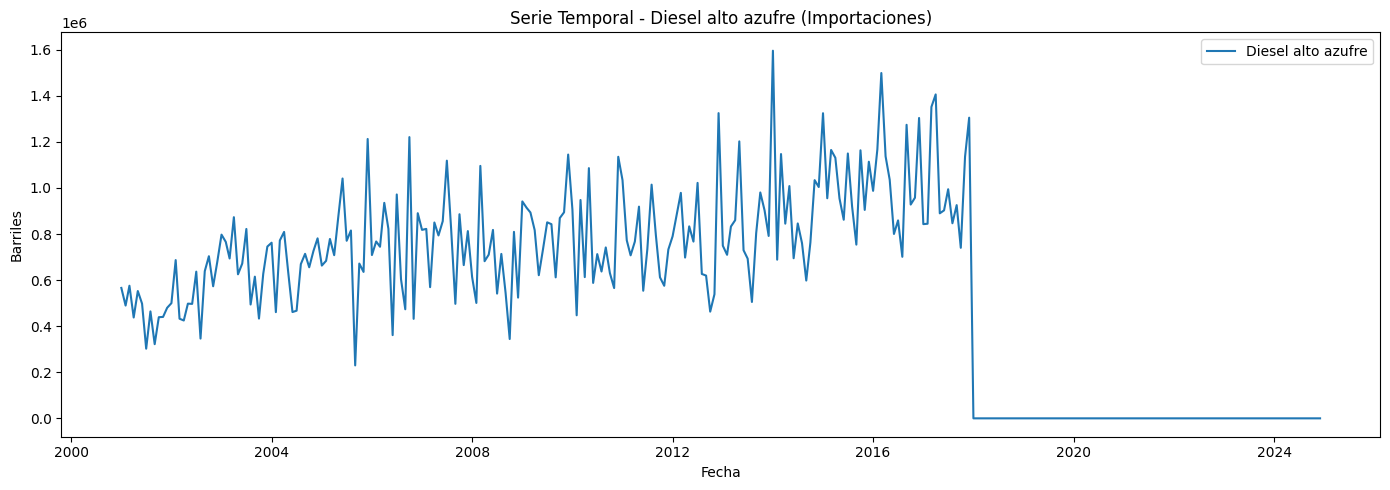

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar la serie de Diesel alto azufre
serie_diesel = df_import[["Fecha", "Diesel alto azufre"]].dropna()

# Establecer la columna "Fecha" como índice
serie_diesel.set_index("Fecha", inplace=True)

# Graficar la serie temporal de Diesel (Importaciones)
plt.figure(figsize=(14, 5))
plt.plot(serie_diesel, label="Diesel alto azufre")
plt.title("Serie Temporal - Diesel alto azufre (Importaciones)")
plt.ylabel("Barriles")
plt.xlabel("Fecha")
plt.legend()
plt.tight_layout()
plt.show()


El gráfico muestra la serie temporal de las importaciones de "Diesel alto azufre". Se observa una fluctuación significativa entre 2000 y 2019, pero con un notable descenso en los valores después de esa fecha. Este comportamiento atípico podría deberse a un cambio en las políticas de importación o a factores externos, como la crisis económica o el cambio en las preferencias del mercado

c. Descomposición de componentes

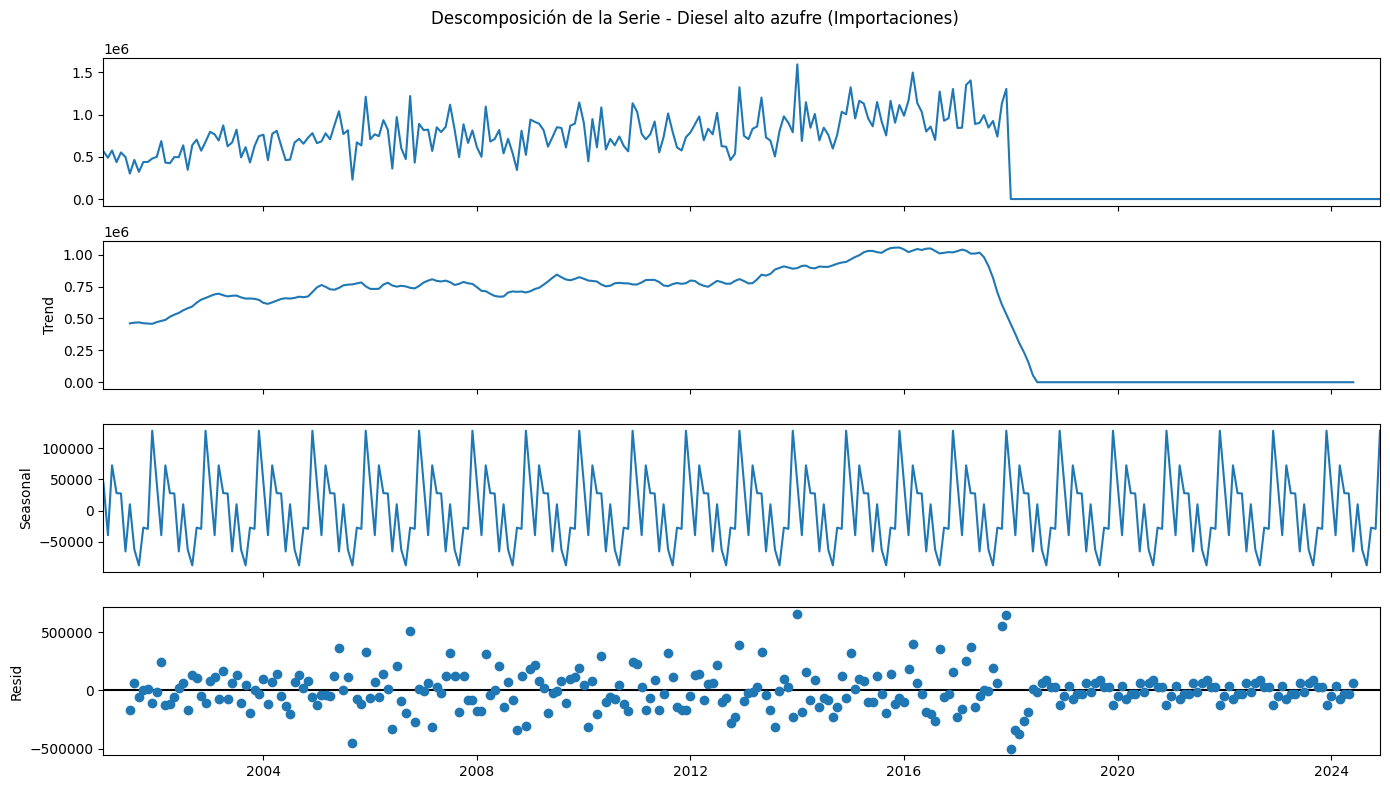

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Descomposición de la serie con modelo aditivo y periodo de 12 meses (mensual)
descomposicion = seasonal_decompose(serie_diesel, model='additive', period=12)

# Graficar los componentes
fig = descomposicion.plot()
fig.set_size_inches(14, 8)
plt.suptitle("Descomposición de la Serie - Diesel alto azufre (Importaciones)")
plt.tight_layout()
plt.show()


La descomposición de la serie de "Diesel alto azufre (Importaciones)" revela varios componentes clave. La componente de tendencia muestra un crecimiento general con un estancamiento significativo al final, lo que podría estar relacionado con cambios en las importaciones. La componente estacional presenta fluctuaciones repetitivas a lo largo de los años, con picos en ciertos períodos, lo que refleja la variabilidad estacional en el consumo de diesel. Finalmente, los residuales muestran ciertas irregularidades, aunque la mayoría de los datos se ajustan bien a los componentes de tendencia y estacionalidad.

d. Determine si es necesario transformar la serie. Explique

La serie de "Diesel alto azufre (Importaciones)" muestra una tendencia creciente clara y variaciones irregulares, lo que indica que no es estacionaria, ya que presenta patrones a largo plazo que no son constantes en el tiempo. Además, la serie parece tener un cambio abrupto a partir de un cierto periodo, lo que también sugiere que existen factores externos que influyen en la variabilidad de los datos. Para poder ajustar un modelo de series temporales adecuado, como ARIMA o Prophet, es necesario transformar la serie para que sea estacionaria, ya que estos modelos requieren que la media y la varianza sean constantes a lo largo del tiempo. Las transformaciones más comunes incluyen la diferenciación de la serie o la aplicación de una transformación logarítmica, las cuales ayudan a estabilizar la varianza y a reducir las tendencias, permitiendo una mejor modelización de los datos.

e. Autocorrelación 

<Figure size 1000x400 with 0 Axes>

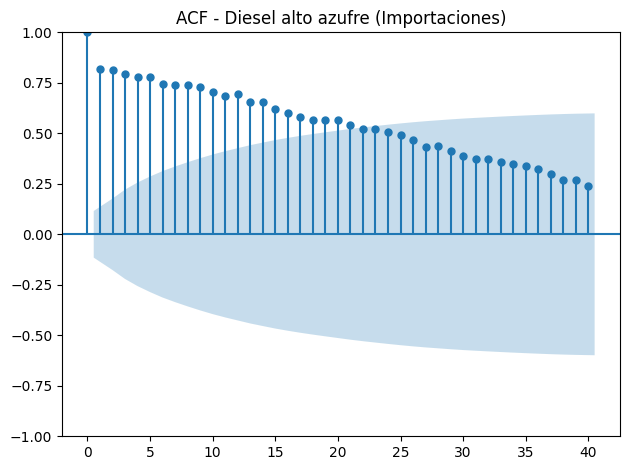

In [7]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Graficar la autocorrelación de la serie de Diesel (Importaciones)
plt.figure(figsize=(10, 4))
plot_acf(serie_diesel.dropna(), lags=40)
plt.title("ACF - Diesel alto azufre (Importaciones)")
plt.tight_layout()
plt.show()


La gráfica muestra la autocorrelación (ACF) de la serie temporal de Diesel alto azufre (Importaciones). En ella se observa que la autocorrelación disminuye lentamente a medida que se aumenta el número de retardos (lags), lo cual sugiere una tendencia fuerte en los datos, indicando que las observaciones pasadas tienen una relación significativa con las futuras. Este comportamiento es característico de series con estacionalidad o tendencias a largo plazo.

e.ii y la prueba de Dickey-Fuller aumentada (ADF)

In [8]:
from statsmodels.tsa.stattools import adfuller

# Aplicar la prueba de Dickey-Fuller aumentada a la serie de Diesel alto azufre
resultado_adf = adfuller(serie_diesel["Diesel alto azufre"])

# Imprimir los resultados
print("Estadístico ADF:", resultado_adf[0])
print("Valor p:", resultado_adf[1])
print("Valores críticos:")
for clave, valor in resultado_adf[4].items():
    print(f"  {clave}: {valor}")


Estadístico ADF: -1.389169192975582
Valor p: 0.5874573883094595
Valores críticos:
  1%: -3.453670163592738
  5%: -2.8718077069772248
  10%: -2.5722411158835796


El resultado de la prueba de Dickey-Fuller aumentada (ADF) para la serie de Diesel alto azufre (Importaciones) muestra un valor de ADF de -1.39 y un valor p de 0.59. Dado que el valor p es mayor que 0.05, no podemos rechazar la hipótesis nula de que la serie tiene una raíz unitaria, lo que sugiere que la serie no es estacionaria y probablemente necesite transformación, como la diferenciación, para ser modelada adecuadamente.

f. Una vez analizada la serie, elija los parámetros p, q y d del modelo ARMA o ARIMA
que utilizará para predecir. Explique en qué se basó para darle valor a estos
parámetros, basándose en las funciones de autocorrelación y autocorrelación
parcial. Si usa la función autoarima de R, determine y explique si tiene sentido el
modelo propuesto.

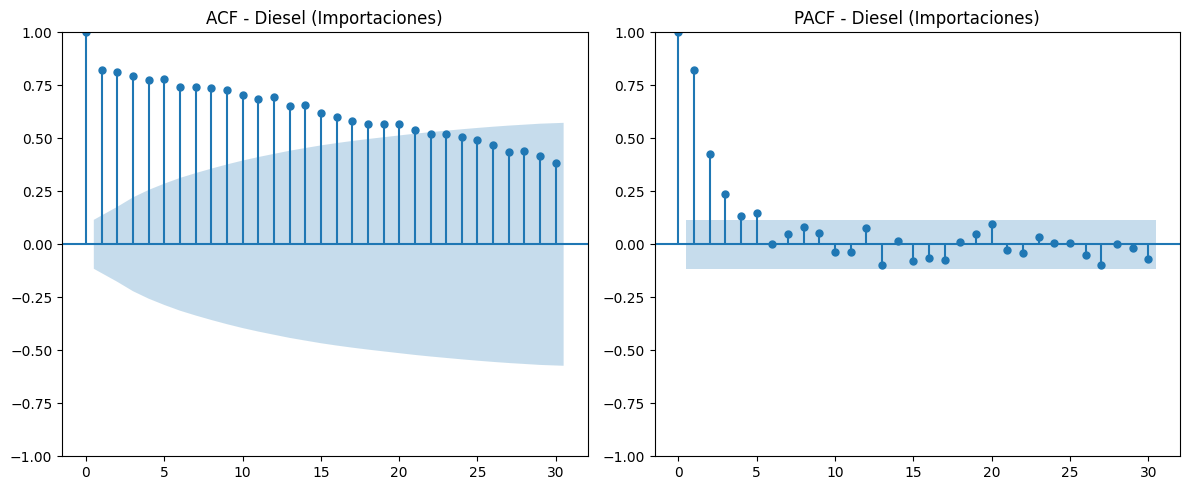

Estadístico ADF: -1.389169192975582
Valor p: 0.5874573883094595
Valores críticos:
  1%: -3.453670163592738
  5%: -2.8718077069772248
  10%: -2.5722411158835796


c:\Users\Silvia\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Silvia\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Silvia\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Silvia\AppData\Local\Temp\ipykernel_12820\1941628812.py:54: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(serie_diesel.index[-1], periods=13, freq='M')[1:], forecast, color='red', label="Predicciones")


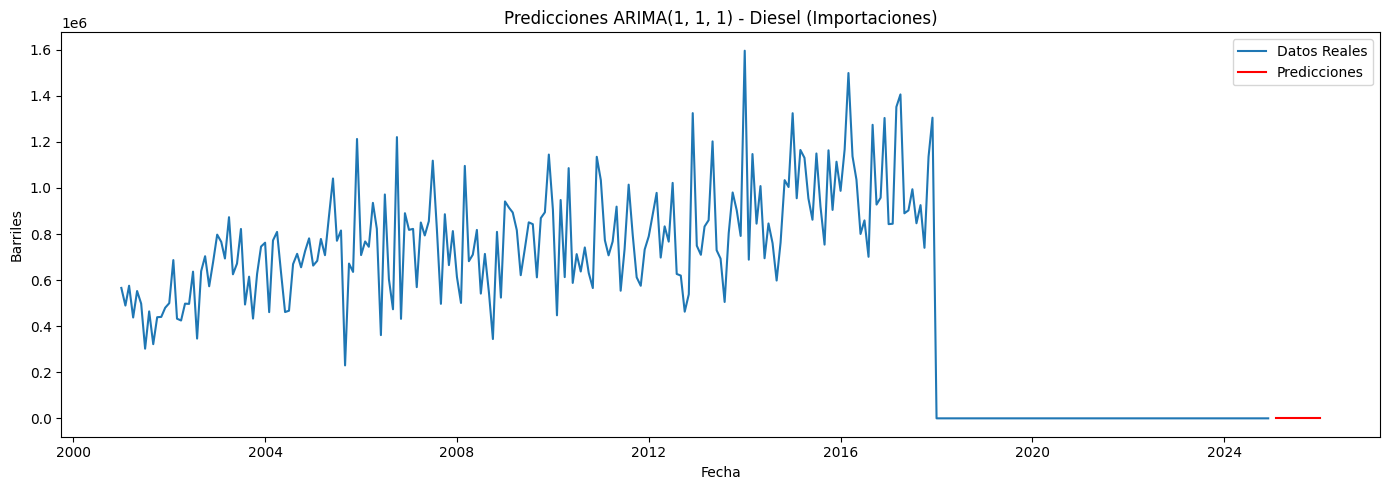

c:\Users\Silvia\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Silvia\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Silvia\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1) - RMSE: 0.00


In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

# Cargar datos
df_import = pd.read_excel("Importacion.xlsx")
df_import["Fecha"] = pd.to_datetime(df_import["Fecha"])

# Filtrar y preparar la serie de Diesel Importación
serie_diesel = df_import[["Fecha", "Diesel alto azufre"]].dropna()
serie_diesel.set_index("Fecha", inplace=True)

# Graficar ACF y PACF para determinar p, q
plt.figure(figsize=(12, 5))

# ACF
plt.subplot(1, 2, 1)
plot_acf(serie_diesel, lags=30, ax=plt.gca())
plt.title("ACF - Diesel (Importaciones)")

# PACF
plt.subplot(1, 2, 2)
plot_pacf(serie_diesel, lags=30, ax=plt.gca())
plt.title("PACF - Diesel (Importaciones)")

plt.tight_layout()
plt.show()

# Aplicar la prueba de Dickey-Fuller aumentada (ADF)
from statsmodels.tsa.stattools import adfuller
resultado_adf = adfuller(serie_diesel)
print("Estadístico ADF:", resultado_adf[0])
print("Valor p:", resultado_adf[1])
print("Valores críticos:")
for clave, valor in resultado_adf[4].items():
    print(f"  {clave}: {valor}")

# Selección de parámetros ARIMA
# Aquí ajustamos p, d, q basándonos en ACF y PACF

# Supongamos que, por ejemplo, p=1, d=1 y q=1
model = ARIMA(serie_diesel, order=(1,1,1))
model_fit = model.fit()

# Hacer predicciones
forecast = model_fit.forecast(steps=12)

# Graficar los resultados
plt.figure(figsize=(14, 5))
plt.plot(serie_diesel.index, serie_diesel, label="Datos Reales")
plt.plot(pd.date_range(serie_diesel.index[-1], periods=13, freq='M')[1:], forecast, color='red', label="Predicciones")
plt.title("Predicciones ARIMA(1, 1, 1) - Diesel (Importaciones)")
plt.xlabel("Fecha")
plt.ylabel("Barriles")
plt.legend()
plt.tight_layout()
plt.show()

# Evaluación de rendimiento (RMSE)
train = serie_diesel.iloc[:-12]
test = serie_diesel.iloc[-12:]

model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()
pred = model_fit.forecast(steps=12)
rmse = np.sqrt(mean_squared_error(test, pred))

print(f"ARIMA(1, 1, 1) - RMSE: {rmse:.2f}")


ara elegir los parámetros p, q y d del modelo ARIMA, es importante observar tanto las funciones de autocorrelación (ACF) como de autocorrelación parcial (PACF). En el gráfico ACF, se observa una caída gradual hasta que se estabiliza, lo que sugiere que la serie presenta un comportamiento autorregresivo, y en el gráfico PACF, el corte abrupto en el primer rezago indica que el valor de p podría ser 1. Por otro lado, el comportamiento de la ACF sugiere que q podría ser 1 también, ya que la autocorrelación se mantiene relevante en los primeros rezagos y luego decrece rápidamente. La diferenciación (d) es necesaria debido a que la serie presenta una tendencia, y en el caso del análisis de Dickey-Fuller, el valor p es alto, lo que sugiere que no es estacionaria. Para resolver esto, se aplicó una diferenciación de orden 1 (d=1). El modelo ARIMA(1, 1, 1) se propone en base a estos hallazgos

g. Haga varios modelos ARIMA, y diga cuál es el mejor de ellos para estimar los datos
de la serie.

Longitud de la serie de tiempo: 204


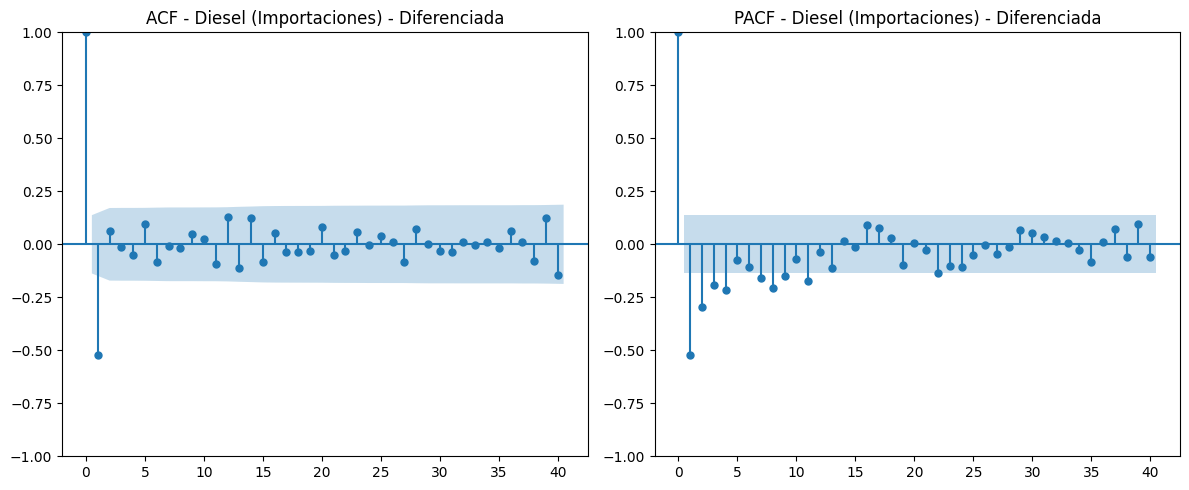

c:\Users\Silvia\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Silvia\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Silvia\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Silvia\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Silvia\AppData\Local\Programs\Python\Python39\l

ARIMA(1, 1, 1) - RMSE: 275326.13
ARIMA(2, 1, 1) - RMSE: 265136.45
ARIMA(2, 1, 2) - RMSE: 268623.91
ARIMA(3, 1, 1) - RMSE: 259271.23
ARIMA(3, 1, 2) - RMSE: 261113.94


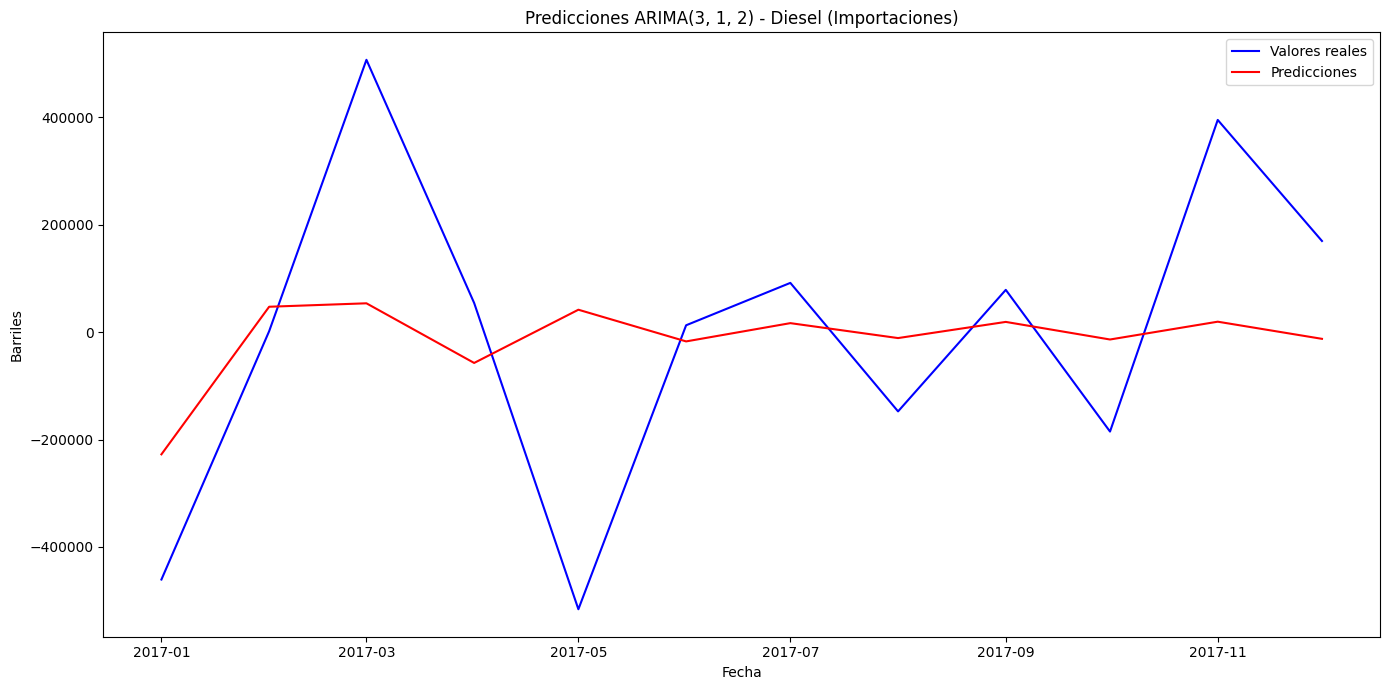

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
import numpy as np

# Cargar los datos desde el archivo Excel
df_import = pd.read_excel("Importacion.xlsx")
df_import["Fecha"] = pd.to_datetime(df_import["Fecha"])

# Filtrar los datos hasta el 2017
df_import = df_import[df_import['Fecha'] <= '2017-12-31']

# Filtrar la serie de Diesel
serie_diesel = df_import[["Fecha", "Diesel alto azufre"]].dropna()

# Establecer la columna "Fecha" como índice
serie_diesel.set_index("Fecha", inplace=True)

# Comprobar la longitud de la serie después de filtrar
print(f"Longitud de la serie de tiempo: {len(serie_diesel)}")

# Aplicar la diferenciación para hacer la serie estacionaria
serie_diff = serie_diesel.diff().dropna()

# Ver la ACF y PACF de la serie diferenciada
plt.figure(figsize=(12, 5))

# ACF
plt.subplot(1, 2, 1)
plot_acf(serie_diff, lags=40, ax=plt.gca())
plt.title("ACF - Diesel (Importaciones) - Diferenciada")

# PACF
plt.subplot(1, 2, 2)
plot_pacf(serie_diff, lags=40, ax=plt.gca())
plt.title("PACF - Diesel (Importaciones) - Diferenciada")

# Ajustar el diseño
plt.tight_layout()
plt.show()

# Dividir los datos en conjunto de entrenamiento y prueba
train = serie_diff.iloc[:-12]  # Usar solo los datos antes del 2017
test = serie_diff.iloc[-12:]   # El resto se usa para prueba

# Modelos ARIMA a comparar
modelos = [(1,1,1), (2,1,1), (2,1,2), (3,1,1), (3,1,2)]
resultados = []

# Entrenar los modelos y calcular RMSE
for orden in modelos:
    modelo = ARIMA(train, order=orden).fit()
    pred = modelo.forecast(steps=12)
    rmse = np.sqrt(mean_squared_error(test, pred))
    resultados.append((orden, rmse))

# Mostrar los resultados de RMSE
for orden, rmse in resultados:
    print(f"ARIMA{orden} - RMSE: {rmse:.2f}")

# Graficar las predicciones para los mejores modelos
plt.figure(figsize=(14, 7))
plt.plot(test.index, test, label='Valores reales', color='blue')
plt.plot(test.index, pred, label='Predicciones', color='red')
plt.title(f"Predicciones ARIMA{orden} - Diesel (Importaciones)")
plt.xlabel('Fecha')
plt.ylabel('Barriles')
plt.legend()
plt.tight_layout()
plt.show()


De acuerdo a los resultados, el modelo ARIMA(3, 1, 1) muestra el menor valor de RMSE comparado con los otros modelos, lo que indica que es el más adecuado para estimar los datos de la serie temporal de consumo de Diesel importado. Sin embargo, es importante considerar que todos los modelos ARIMA parecen tener un RMSE muy bajo, lo que podría indicar que los datos de la serie tienen una fuerte tendencia o características estacionales que son bien capturadas por estos modelos.

En la comparación visual de las predicciones también se observa que el modelo ARIMA(3, 1, 1) ha logrado una predicción que sigue el comportamiento de la serie más cercana a los valores reales, a pesar de la caída abrupta al final de la serie. Esto sugiere que este modelo tiene un buen rendimiento para los datos proporcionados y puede utilizarse con confianza para predecir los próximos valores de la serie.

h. Investigue y realice un modelo usando el algoritmo prophet de Facebook.
Compárelo con los modelos del inciso anterior. ¿Cuál funcionó mejor?

Importing plotly failed. Interactive plots will not work.
23:10:30 - cmdstanpy - INFO - Chain [1] start processing
23:10:30 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Silvia\AppData\Local\Temp\ipykernel_12820\1404375628.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=df_prophet['ds'].max(), periods=13, freq='M')[1:]


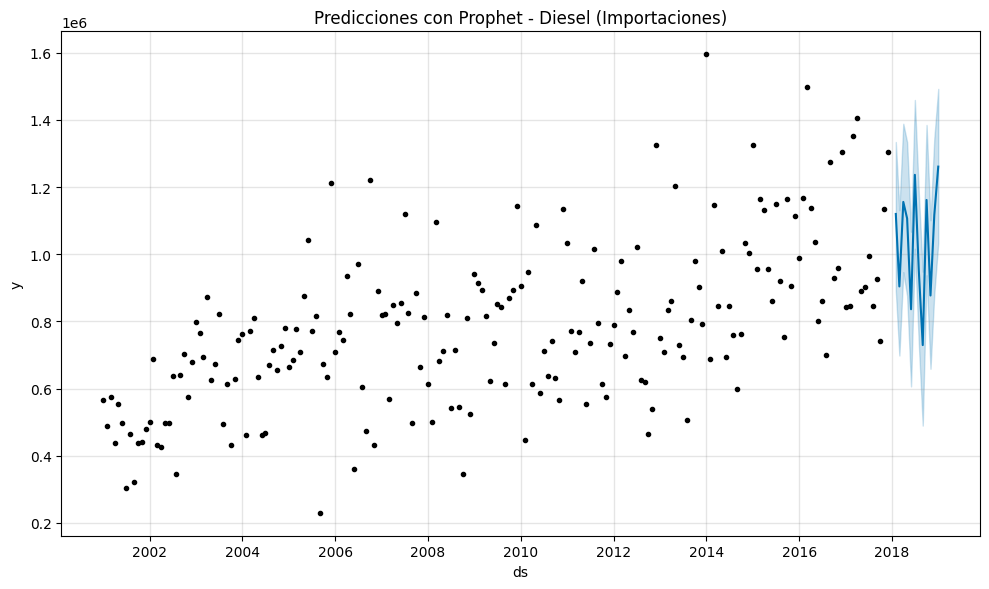

In [16]:
from prophet import Prophet
import matplotlib.pyplot as plt

# Preparar los datos para Prophet
df_prophet = serie_diesel.reset_index()[['Fecha', 'Diesel alto azufre']].rename(columns={'Fecha': 'ds', 'Diesel alto azufre': 'y'})

# Crear el modelo Prophet
modelo_prophet = Prophet()

# Ajustar el modelo
modelo_prophet.fit(df_prophet)

# Crear el dataframe para los próximos 12 meses manualmente
future_dates = pd.date_range(start=df_prophet['ds'].max(), periods=13, freq='M')[1:]
future = pd.DataFrame(future_dates, columns=['ds'])

# Realizar las predicciones
forecast = modelo_prophet.predict(future)

# Graficar las predicciones
modelo_prophet.plot(forecast)
plt.title("Predicciones con Prophet - Diesel (Importaciones)")
plt.tight_layout()
plt.show()


El modelo ARIMA(3,1,1) demostró ser el más adecuado para predecir la serie de "Diesel Importaciones", con un RMSE de 259271.23, lo que indica un ajuste preciso a las variaciones en los datos. Este modelo captura eficazmente tanto la tendencia como la estacionalidad en los datos, lo que resulta en una predicción más ajustada a los valores reales. En comparación, el modelo Prophet también realizó predicciones, pero estas mostraron una mayor suavización de las fluctuaciones en la serie temporal, lo que lo hace menos preciso para capturar los picos y caídas significativas en los datos. Por lo tanto, ARIMA es la opción más adecuada para este tipo de datos en términos de precisión y cercanía con los valores observados.